### CSE-221710304062-Vaishnavi.B

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
type(train_labels)

numpy.ndarray

In [4]:
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

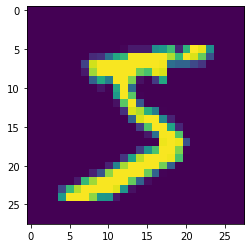

In [6]:
plt.imshow(train_digits[0])

In [7]:
sample=np.random.randint(train_digits.shape[0],size=16)
sample

array([24359, 39473, 36059, 28655, 39611, 13102, 50197, 52815, 18434,
        7254, 25941, 27048, 54555, 58734, 25920, 47970])

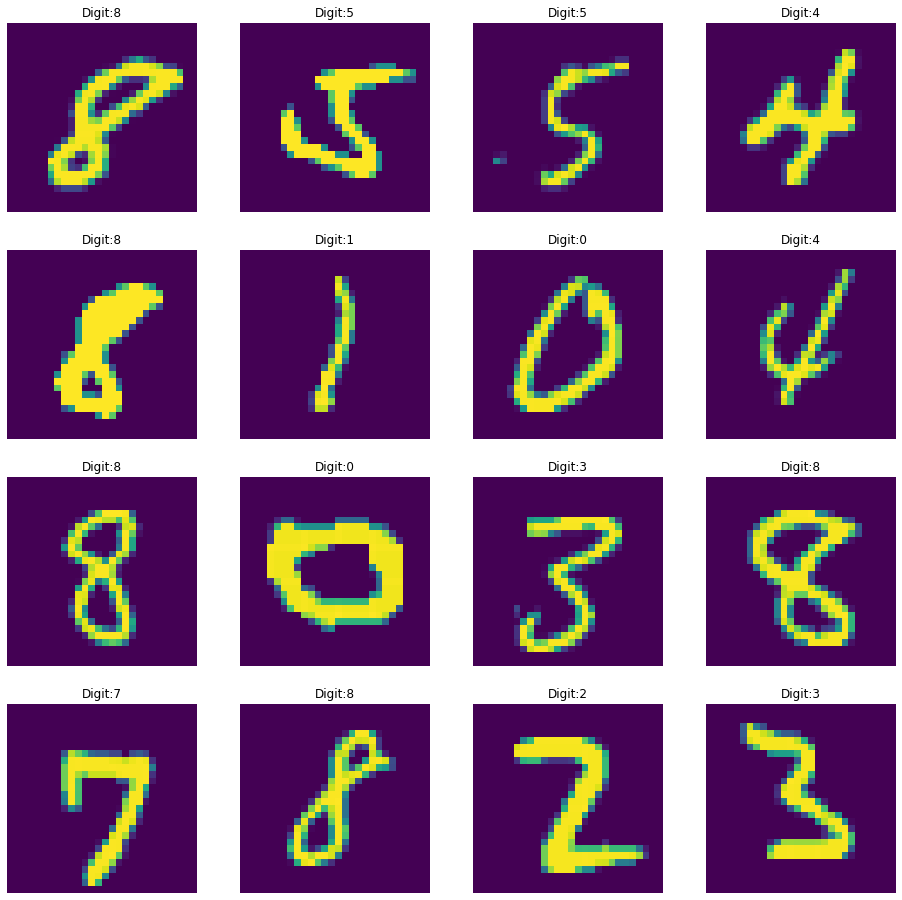

In [8]:
plt.figure(figsize=(16,16))
j=1
for i in sample:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j += 1

In [9]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [10]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [11]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat=to_categorical(test_labels)
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


### Model1

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.2432 - accuracy: 0.9263 - val_loss: 0.1313 - val_accuracy: 0.9602
Epoch 2/5
54000/54000 [==============================] - 6s 110us/step - loss: 0.1081 - accuracy: 0.9677 - val_loss: 0.1274 - val_accuracy: 0.9648
Epoch 3/5
54000/54000 [==============================] - 6s 111us/step - loss: 0.0819 - accuracy: 0.9747 - val_loss: 0.1335 - val_accuracy: 0.9660
Epoch 4/5
54000/54000 [==============================] - 6s 108us/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.1007 - val_accuracy: 0.9703
Epoch 5/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.1163 - val_accuracy: 0.9695


In [16]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.09756551927337423, 0.9736999869346619]

In [17]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [18]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.5063689e-08, 8.1894805e-06, 2.8550094e-05, 2.6063122e-05,
        3.2696715e-07, 3.8232824e-07, 1.0128249e-10, 9.9889022e-01,
        3.8084183e-06, 1.0423594e-03]], dtype=float32)

In [19]:
model.predict(test_digits_sc[:10])

array([[3.50637528e-08, 8.18949593e-06, 2.85501210e-05, 2.60631477e-05,
        3.26967466e-07, 3.82328579e-07, 1.01282878e-10, 9.98890221e-01,
        3.80842198e-06, 1.04236091e-03],
       [6.07989890e-08, 6.45844196e-08, 9.99999404e-01, 3.18345229e-07,
        2.42050491e-10, 2.63424371e-09, 9.92432891e-09, 5.47098296e-08,
        2.55227750e-08, 6.16406882e-14],
       [8.44893918e-07, 9.99912024e-01, 4.37038943e-06, 1.04711987e-07,
        5.60031958e-06, 3.93357413e-06, 1.24245089e-05, 2.54921724e-05,
        3.39028484e-05, 1.20486050e-06],
       [9.99949813e-01, 1.05702336e-09, 3.60056561e-06, 2.27354384e-08,
        8.37375325e-08, 3.56556775e-08, 1.71291038e-06, 1.74295725e-08,
        9.86999112e-07, 4.35919319e-05],
       [2.11591851e-06, 8.82289314e-05, 1.04782985e-05, 4.21390780e-07,
        9.95360076e-01, 1.30007975e-04, 2.40877343e-05, 3.39471968e-03,
        1.74249435e-05, 9.72431444e-04],
       [1.41684282e-08, 9.99994874e-01, 1.21572896e-07, 2.11879736e-09,
   

In [20]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [21]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.5063689e-08, 8.1894805e-06, 2.8550094e-05, 2.6063122e-05,
        3.2696715e-07, 3.8232824e-07, 1.0128249e-10, 9.9889022e-01,
        3.8084183e-06, 1.0423594e-03]], dtype=float32)

In [22]:
history.history

{'accuracy': [0.9262593, 0.9677037, 0.9747037, 0.9796852, 0.984],
 'loss': [0.2431506030683716,
  0.10810416151776359,
  0.08192410453771137,
  0.0649827464330355,
  0.052406293537014995],
 'val_accuracy': [0.9601666927337646,
  0.9648333191871643,
  0.9660000205039978,
  0.9703333377838135,
  0.9695000052452087],
 'val_loss': [0.13132603826125464,
  0.1274277680714925,
  0.13349787418233852,
  0.10065851721105476,
  0.11629423975447814]}

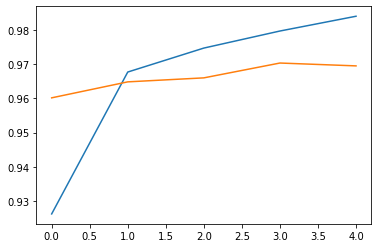

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Model2

In [24]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [25]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.2616 - accuracy: 0.9206 - val_loss: 0.1370 - val_accuracy: 0.9590
Epoch 2/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.1114 - accuracy: 0.9662 - val_loss: 0.1120 - val_accuracy: 0.9693
Epoch 3/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.0791 - accuracy: 0.9760 - val_loss: 0.1070 - val_accuracy: 0.9727
Epoch 4/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0630 - accuracy: 0.9802 - val_loss: 0.1031 - val_accuracy: 0.9728
Epoch 5/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.0524 - accuracy: 0.9845 - val_loss: 0.1145 - val_accuracy: 0.9718


In [26]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.10895154207658489, 0.9704999923706055]

In [27]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [28]:
model1.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.9032852e-09, 6.5156087e-08, 3.3629400e-05, 1.2641876e-05,
        5.7497850e-08, 1.1940697e-09, 1.9795558e-12, 9.9999869e-01,
        1.1941295e-08, 4.0934665e-06]], dtype=float32)

In [29]:
model1.predict(test_digits_sc[:10])

array([[2.90328517e-09, 6.51559589e-08, 3.36293997e-05, 1.26419000e-05,
        5.74977399e-08, 1.19406751e-09, 1.97955584e-12, 9.99998689e-01,
        1.19413190e-08, 4.09346649e-06],
       [2.56147672e-08, 2.05673388e-07, 1.00000000e+00, 6.43158558e-08,
        6.25889243e-08, 2.88396951e-08, 5.16444310e-09, 7.47991962e-08,
        5.42377121e-09, 2.55344391e-11],
       [1.77402774e-06, 9.90565717e-01, 1.56462193e-04, 9.53717972e-07,
        9.92878558e-05, 3.32981348e-04, 1.48355961e-04, 1.04227420e-05,
        5.79903062e-05, 4.22732819e-06],
       [9.99953747e-01, 7.53838449e-08, 8.38187987e-07, 6.09175117e-07,
        9.86429427e-07, 4.76710784e-06, 1.66003574e-05, 1.97855570e-06,
        2.05413949e-06, 2.79569781e-06],
       [1.97055634e-08, 4.18202660e-07, 4.49781783e-06, 7.57369012e-09,
        9.99968052e-01, 6.21440108e-07, 2.82011661e-06, 2.42537044e-06,
        1.68447372e-07, 1.07101645e-04],
       [1.32760050e-07, 9.98807907e-01, 6.03287026e-06, 3.64495598e-08,
   

In [30]:
model1.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [31]:
model1.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.9032852e-09, 6.5156087e-08, 3.3629400e-05, 1.2641876e-05,
        5.7497850e-08, 1.1940697e-09, 1.9795558e-12, 9.9999869e-01,
        1.1941295e-08, 4.0934665e-06]], dtype=float32)

In [32]:
history.history

{'accuracy': [0.9206111, 0.9661852, 0.9759815, 0.98024076, 0.984463],
 'loss': [0.2616167579646464,
  0.11137858322042006,
  0.07909792387899425,
  0.06300770175953706,
  0.0523975230651235],
 'val_accuracy': [0.9589999914169312,
  0.9693333506584167,
  0.9726666808128357,
  0.9728333353996277,
  0.971833348274231],
 'val_loss': [0.13704036620507637,
  0.1119897210697333,
  0.10696630862976114,
  0.10308430087504288,
  0.11452092653140426]}

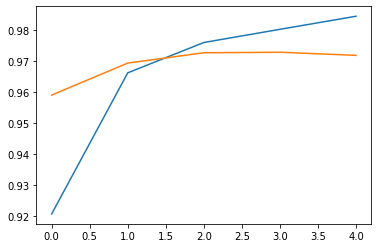

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- The accuarcy and Val_Accuracy of the model 1 is :[0.10071307541152345, 0. 9724000096321106]

- The accuarcy andVal_Accuracy of the model 2 is :[0.10321083835801109, 0.9724000096321106]

- Hence model 2 is best than model 1